# Notebook | PhyNum : motifs au fond d'une piscine

## Import

In [1]:
from surface import *
from caustiques import *

import cProfile
import pstats

profiler = cProfile.Profile()



## Initialisations

In [2]:
direction = np.array([0, 0, -1])  # direction de la lumière


rayons = []
for i in range(Nx-1):
    rayons.append([])
    for j in range(Ny-1):
        rayons[i].append(Rayon(np.array([(i+1/2)*dx, (j+1/2)*dy, 2*H]), direction, 1))


### Spectre de Phillips

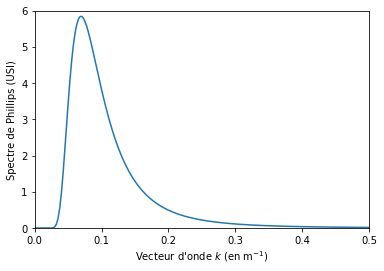

In [3]:
vals_kx = np.linspace(0, 0.5, 200)
spectre = [spectre_Phillips(kx, 0) for kx in vals_kx]

plt.xlim(0, 0.5)
plt.ylim(0, 6)

plt.xlabel(r"Vecteur d'onde $k$ (en m$^{-1})$")
plt.ylabel(r"Spectre de Phillips (USI)")

plt.plot(vals_kx, spectre)
plt.savefig("spectre Phillips.pdf")
plt.show()


### Surface initiale

In [4]:
surface = np.zeros((Nx, Ny))
amplitude_fourier_plus = np.zeros((Nx, Ny), dtype=complex)
B = np.zeros((Nx, Ny), dtype=complex)

for i in range(Nx):
    for j in range(Ny):
        kx = (i-Nx/2)*dkx
        ky = (j-Ny/2)*dky
        amplitude_fourier_plus[i, j] = random_amplitude_fourier_plus(kx, ky, spectre_Phillips, np.array([1, 0]))

        B[i, j] = np.conjugate(amplitude_fourier_plus[-i, -j])


update_surface(surface, 0, amplitude_fourier_plus, B)


## Calculs

In [5]:
profiler.enable()

trajectoires = calcul_trajectoires(rayons, surface, 0, amplitude_fourier_plus, B)

profiler.disable()



Calcul des trajectoires : 100%|██████████| 127/127 [00:08<00:00, 15.49it/s]


### Profiling

In [6]:
stats = pstats.Stats(profiler).sort_stats("cumtime")
stats.print_stats()


         7634115 function calls (7343750 primitive calls) in 9.422 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    9.422    4.711 c:\Users\Florent\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3403(run_code)
      8/2    0.000    0.000    9.422    4.711 {built-in method builtins.exec}
        1    0.000    0.000    9.422    9.422 C:\Users\Florent\AppData\Local\Temp\ipykernel_10348\3633937949.py:3(<module>)
        1    0.063    0.063    9.422    9.422 c:\Users\Florent\Documents\Travail\M1 Physique (mag 2)\Cours\PhyNum\PhyNum Projet\PhyNum-Piscine\caustiques.py:11(calcul_trajectoires)
    32258    0.115    0.000    7.056    0.000 c:\Users\Florent\Documents\Travail\M1 Physique (mag 2)\Cours\PhyNum\PhyNum Projet\PhyNum-Piscine\raytracing.py:320(find_point_intersection)
    32258    0.090    0.000    6.735    0.000 c:\Users\Florent\Documents\Travail\M1

In [7]:
motif = calcul_motifs(rayons)

motif = np.sqrt(motif)

image = motif_to_alpha(motif)
plt.imsave(f"images/caustiques Nx={Nx}.png", image)


## Affichage

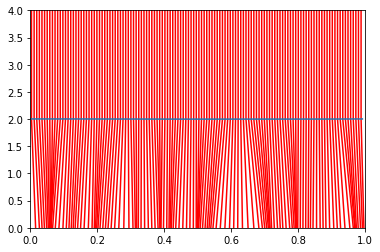

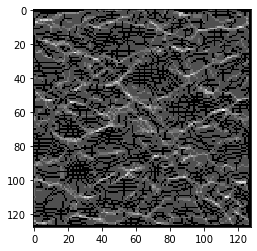

In [8]:
plot_surface(surface)
plt.show()


affiche_rayons(rayons, surface, save=True)
plt.show()


plt.imshow(motif, cmap="gray")
plt.show()


In [9]:

genere_animation(surface, amplitude_fourier_plus, rayons, save_motif=True)


frame: 100%|██████████| 25/25 [02:51<00:00,  6.88s/it]


In [10]:

images = [Image.open(f"Frames/frame{n}.png") for n in range(frames)]

images[0].save(f"gif/wave Nx={Nx}.gif", save_all=True,
                append_images=images[1:], duration=dt*10**3, loop=0)
    
images = [Image.open(f"Frames/frame {n} image.png") for n in range(frames)]

images[0].save(f"gif/caustiques dynamique Nx={Nx}.gif", save_all=True,
                   append_images=images[1:], duration=dt*10**3, loop=0)
